In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0

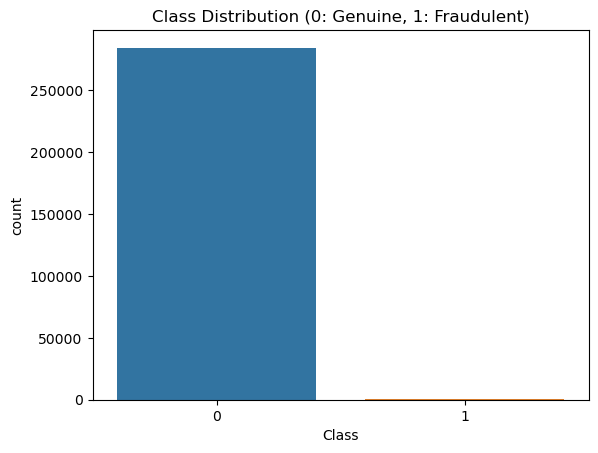

In [2]:
df = pd.read_csv("creditcard.csv") 

print(df.head(9))

print(df.info())

print(df.isnull().sum())

print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Genuine, 1: Fraudulent)")
plt.show()



In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

print(X.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [4]:
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]  

df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=42)

df_balanced = pd.concat([df_majority, df_minority_oversampled])

df_balanced = df_balanced.sample(frac=1, random_state=42)

print(df_balanced['Class'].value_counts())


1    284315
0    284315
Name: Class, dtype: int64


In [5]:
X = df_balanced.drop('Class', axis=1) 
y = df_balanced['Class'] 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

print(X.shape, y.shape)


(568630, 30) (568630,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (454904, 30)
Testing data shape: (113726, 30)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57219
           1       1.00      1.00      1.00     56507

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
 [[57216     3]
 [    0 56507]]


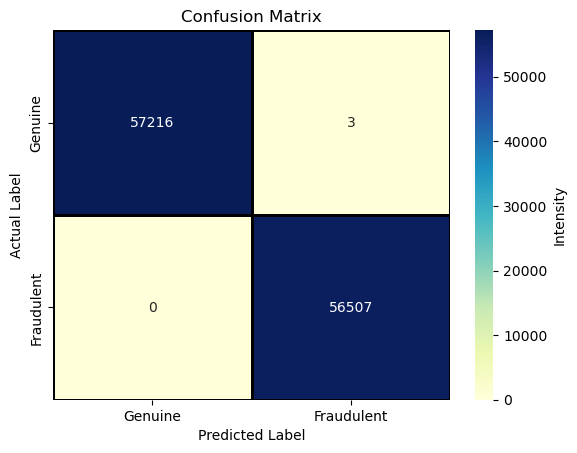


ROC-AUC Score: 1.00


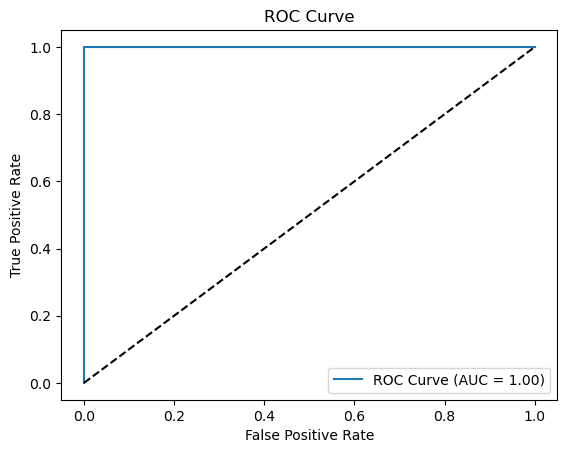

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Intensity'},linewidths=2, linecolor='black', xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
